In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [5]:
td = pd.read_csv("Train-1617360447408-1660719685476.csv")

In [6]:
td.shape

(66587, 49)

In [7]:
td.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [8]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                66587 non-null  object 
 4   gender              66587 non-null  object 
 5   age                 66587 non-null  object 
 6   weight              66587 non-null  object 
 7   time_in_hospital    66587 non-null  int64  
 8   medical_specialty   66587 non-null  object 
 9   num_lab_procedures  66587 non-null  int64  
 10  num_procedures      66587 non-null  int64  
 11  num_medications     66587 non-null  int64  
 12  number_outpatient   66587 non-null  int64  
 13  number_emergency    66587 non-null  int64  
 14  number_inpatient    66587 non-null  int64  
 15  diag_1              66587 non-null  object 
 16  diag

In [9]:
td.replace('?',np.nan,inplace=True)


In [10]:
td.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),NaN,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),NaN,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),NaN,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),NaN,5,NaN,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),NaN,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [11]:
print(td.dtypes)

index                   int64
encounter_id            int64
patient_id              int64
race                   object
gender                 object
age                    object
weight                 object
time_in_hospital        int64
medical_specialty      object
num_lab_procedures      int64
num_procedures          int64
num_medications         int64
number_outpatient       int64
number_emergency        int64
number_inpatient        int64
diag_1                 object
diag_2                 object
diag_3                 object
diag_4                 object
diag_5                float64
number_diagnoses        int64
X1                     object
X2                     object
X3                     object
X4                     object
X5                     object
X6                     object
X7                     object
X8                     object
X9                     object
X10                    object
X11                    object
X12                    object
X13       

In [12]:
td.describe()

,index,encounter_id,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_5,number_diagnoses,readmitted
count,66587.000000,6.658700e+04,6.658700e+04,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000,66587.000000
mean,50903.474282,1.653153e+08,5.422970e+07,4.397510,43.115533,1.331521,16.028744,0.365672,0.200460,0.637602,49.703387,7.424948,0.462012
std,29480.255515,1.030035e+08,3.878819e+07,2.980995,19.630417,1.705746,8.125304,1.221861,0.905503,1.255487,28.864879,1.933061,0.498559
min,0.000000,1.573800e+04,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000283,1.000000,0.000000
25%,25166.500000,8.440328e+07,2.338646e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,24.622056,6.000000,0.000000
50%,51129.000000,1.528504e+08,4.526103e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,49.508499,8.000000,0.000000
75%,76380.000000,2.305049e+08,8.727185e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,74.637294,9.000000,1.000000
max,101765.000000,4.438672e+08,1.893494e+08,14.000000,129.000000,6.000000,81.000000,39.000000,63.000000,19.000000,99.995810,16.000000,1.000000


In [13]:
td.isna().sum()

index                     0
encounter_id              0
patient_id                0
race                   1504
gender                    0
age                       0
weight                64454
time_in_hospital          0
medical_specialty     32672
num_lab_procedures        0
num_procedures            0
num_medications           0
number_outpatient         0
number_emergency          0
number_inpatient          0
diag_1                   15
diag_2                  231
diag_3                  954
diag_4                  954
diag_5                    0
number_diagnoses          0
X1                        0
X2                        0
X3                        0
X4                        0
X5                        0
X6                        0
X7                        0
X8                        0
X9                        0
X10                       0
X11                       0
X12                       0
X13                       0
X14                       0
X15                 

In [14]:
td['race'] =td['race'].fillna(td['race'].mode()[0])
td['medical_specialty'] = td['medical_specialty'].fillna(td['medical_specialty'].mode()[0])
td['diag_1'] =td['diag_1'].fillna(td['diag_1'].mode()[0])
td['diag_2'] = td['diag_2'].fillna(td['diag_2'].mode()[0])
td['diag_3'] = td['diag_3'].fillna(td['diag_3'].mode()[0])
td['diag_4'] = td['diag_4'].fillna(td['diag_4'].mode()[0])

In [15]:
td.isna().sum()

index                     0
encounter_id              0
patient_id                0
race                      0
gender                    0
age                       0
weight                64454
time_in_hospital          0
medical_specialty         0
num_lab_procedures        0
num_procedures            0
num_medications           0
number_outpatient         0
number_emergency          0
number_inpatient          0
diag_1                    0
diag_2                    0
diag_3                    0
diag_4                    0
diag_5                    0
number_diagnoses          0
X1                        0
X2                        0
X3                        0
X4                        0
X5                        0
X6                        0
X7                        0
X8                        0
X9                        0
X10                       0
X11                       0
X12                       0
X13                       0
X14                       0
X15                 

In [16]:
td = td.drop(['weight'], axis = 1)

In [17]:
td.isna().sum()

index                 0
encounter_id          0
patient_id            0
race                  0
gender                0
age                   0
time_in_hospital      0
medical_specialty     0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
diag_4                0
diag_5                0
number_diagnoses      0
X1                    0
X2                    0
X3                    0
X4                    0
X5                    0
X6                    0
X7                    0
X8                    0
X9                    0
X10                   0
X11                   0
X12                   0
X13                   0
X14                   0
X15                   0
X16                   0
X17                   0
X18                   0
X19                   0
X20                   0
X21                   0
X22             

In [18]:
for col in td.dtypes[td.dtypes=='object'].index:
    for_dummy=td.pop(col)
    td=pd.concat([td,pd.get_dummies(for_dummy,prefix=col)],axis=1)
td.head()

,index,encounter_id,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,X22_Steady,X23_No,X23_Steady,X24_No,X24_Steady,X25_No,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,69375,197029140,51521940,4,39,1,9,1,1,4,...,0,1,0,1,0,1,0,1,0,1
1,57272,163571946,92631357,3,34,1,12,0,0,0,...,0,1,0,1,0,1,0,1,1,0
2,82347,256497366,30023982,6,50,2,24,0,0,5,...,0,1,0,1,0,1,1,0,0,1
3,89608,289891212,93606021,5,63,0,14,0,0,0,...,0,1,0,1,0,1,1,0,0,1
4,24091,81873900,23464296,9,17,1,11,0,0,0,...,0,1,0,1,0,1,0,1,1,0


In [19]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Columns: 2891 entries, index to diabetesMed_Yes
dtypes: float64(1), int64(12), uint8(2878)
memory usage: 189.4 MB


In [20]:
X_train=td.drop(['patient_id','encounter_id','index'],axis=1)
X_train

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_5,number_diagnoses,readmitted,...,X22_Steady,X23_No,X23_Steady,X24_No,X24_Steady,X25_No,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,4,39,1,9,1,1,4,32.970966,9,1,...,0,1,0,1,0,1,0,1,0,1
1,3,34,1,12,0,0,0,94.116731,6,0,...,0,1,0,1,0,1,0,1,1,0
2,6,50,2,24,0,0,5,64.138297,9,1,...,0,1,0,1,0,1,1,0,0,1
3,5,63,0,14,0,0,0,13.832428,7,1,...,0,1,0,1,0,1,1,0,0,1
4,9,17,1,11,0,0,0,82.898368,9,1,...,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66582,11,40,4,35,0,0,0,64.439655,6,0,...,0,1,0,1,0,1,0,1,0,1
66583,4,39,1,7,0,0,0,39.133605,9,1,...,0,1,0,1,0,1,0,1,1,0
66584,2,24,1,13,0,0,2,97.187192,6,1,...,0,1,0,1,0,1,0,1,0,1
66585,4,39,1,14,0,0,0,16.856253,9,0,...,0,1,0,1,0,1,0,1,1,0


In [21]:
Y_train=td['readmitted'].values

In [22]:
tsd = pd.read_csv("test-1617360461595-1660719701431.csv")

In [23]:
tsd.shape

(16647, 48)

In [24]:
tsd.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X18,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed
0,11128,46325466,3928383,Caucasian,Female,[70-80),?,3,?,45,...,No,No,No,No,No,No,No,No,No,Yes
1,79758,245219616,60926103,Caucasian,Male,[60-70),?,2,?,10,...,No,No,No,No,No,No,No,No,No,Yes
2,52497,155321232,25234848,AfricanAmerican,Male,[70-80),?,11,InternalMedicine,41,...,No,No,Steady,No,No,No,No,No,No,Yes
3,64504,179491944,86935374,Caucasian,Female,[70-80),?,1,InternalMedicine,71,...,No,No,No,No,No,No,No,No,No,No
4,987,7425954,2486826,AfricanAmerican,Female,[50-60),?,7,InternalMedicine,59,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [25]:
tsd.replace('?',np.nan,inplace=True)

In [26]:
tsd.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X18,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed
0,11128,46325466,3928383,Caucasian,Female,[70-80),NaN,3,NaN,45,...,No,No,No,No,No,No,No,No,No,Yes
1,79758,245219616,60926103,Caucasian,Male,[60-70),NaN,2,NaN,10,...,No,No,No,No,No,No,No,No,No,Yes
2,52497,155321232,25234848,AfricanAmerican,Male,[70-80),NaN,11,InternalMedicine,41,...,No,No,Steady,No,No,No,No,No,No,Yes
3,64504,179491944,86935374,Caucasian,Female,[70-80),NaN,1,InternalMedicine,71,...,No,No,No,No,No,No,No,No,No,No
4,987,7425954,2486826,AfricanAmerican,Female,[50-60),NaN,7,InternalMedicine,59,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [27]:
print(tsd.dtypes)

index                   int64
encounter_id            int64
patient_id              int64
race                   object
gender                 object
age                    object
weight                 object
time_in_hospital        int64
medical_specialty      object
num_lab_procedures      int64
num_procedures          int64
num_medications         int64
number_outpatient       int64
number_emergency        int64
number_inpatient        int64
diag_1                 object
diag_2                 object
diag_3                 object
diag_4                 object
diag_5                float64
number_diagnoses        int64
X1                     object
X2                     object
X3                     object
X4                     object
X5                     object
X6                     object
X7                     object
X8                     object
X9                     object
X10                    object
X11                    object
X12                    object
X13       

In [28]:
tsd.describe()

,index,encounter_id,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_5,number_diagnoses
count,16647.000000,1.664700e+04,1.664700e+04,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000
mean,50466.520154,1.639414e+08,5.417128e+07,4.366132,43.055866,1.344206,15.954646,0.367093,0.196972,0.633267,50.496779,7.398630
std,29480.114748,1.030296e+08,3.884859e+07,2.950424,19.623995,1.706926,8.093555,1.265388,0.782756,1.243029,28.767488,1.949511
min,26.000000,2.363160e+05,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.005308,1.000000
25%,24566.500000,8.313437e+07,2.333162e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,25.491497,6.000000
50%,50707.000000,1.520358e+08,4.539897e+07,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,50.911778,8.000000
75%,75869.500000,2.282969e+08,8.764641e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,75.355292,9.000000
max,101759.000000,4.438428e+08,1.894451e+08,14.000000,109.000000,6.000000,81.000000,39.000000,20.000000,16.000000,99.999144,16.000000


In [29]:
tsd.isna().sum()

index                     0
encounter_id              0
patient_id                0
race                    371
gender                    0
age                       0
weight                16107
time_in_hospital          0
medical_specialty      8081
num_lab_procedures        0
num_procedures            0
num_medications           0
number_outpatient         0
number_emergency          0
number_inpatient          0
diag_1                    3
diag_2                   63
diag_3                  247
diag_4                  247
diag_5                    0
number_diagnoses          0
X1                        0
X2                        0
X3                        0
X4                        0
X5                        0
X6                        0
X7                        0
X8                        0
X9                        0
X10                       0
X11                       0
X12                       0
X13                       0
X14                       0
X15                 

In [30]:
tsd['race'] =tsd['race'].fillna(tsd['race'].mode()[0])
tsd['medical_specialty'] = tsd['medical_specialty'].fillna(tsd['medical_specialty'].mode()[0])
tsd['diag_1'] =tsd['diag_1'].fillna(tsd['diag_1'].mode()[0])
tsd['diag_2'] = tsd['diag_2'].fillna(tsd['diag_2'].mode()[0])
tsd['diag_3'] = tsd['diag_3'].fillna(tsd['diag_3'].mode()[0])
tsd['diag_4'] = tsd['diag_4'].fillna(tsd['diag_4'].mode()[0])

In [31]:
tsd.isna().sum()

index                     0
encounter_id              0
patient_id                0
race                      0
gender                    0
age                       0
weight                16107
time_in_hospital          0
medical_specialty         0
num_lab_procedures        0
num_procedures            0
num_medications           0
number_outpatient         0
number_emergency          0
number_inpatient          0
diag_1                    0
diag_2                    0
diag_3                    0
diag_4                    0
diag_5                    0
number_diagnoses          0
X1                        0
X2                        0
X3                        0
X4                        0
X5                        0
X6                        0
X7                        0
X8                        0
X9                        0
X10                       0
X11                       0
X12                       0
X13                       0
X14                       0
X15                 

In [32]:
tsd = tsd.drop(['weight'], axis = 1)

In [33]:
tsd.isna().sum()

index                 0
encounter_id          0
patient_id            0
race                  0
gender                0
age                   0
time_in_hospital      0
medical_specialty     0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
diag_4                0
diag_5                0
number_diagnoses      0
X1                    0
X2                    0
X3                    0
X4                    0
X5                    0
X6                    0
X7                    0
X8                    0
X9                    0
X10                   0
X11                   0
X12                   0
X13                   0
X14                   0
X15                   0
X16                   0
X17                   0
X18                   0
X19                   0
X20                   0
X21                   0
X22             

In [34]:
for col in tsd.dtypes[tsd.dtypes=='object'].index:
    for_dummy=tsd.pop(col)
    tsd=pd.concat([tsd,pd.get_dummies(for_dummy,prefix=col)],axis=1)
tsd.head()

,index,encounter_id,patient_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,X21_Up,X22_No,X22_Steady,X23_No,X24_No,X25_No,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,11128,46325466,3928383,3,45,3,10,0,0,1,...,0,1,0,1,1,1,0,1,0,1
1,79758,245219616,60926103,2,10,1,16,1,0,0,...,0,1,0,1,1,1,0,1,0,1
2,52497,155321232,25234848,11,41,1,15,0,0,1,...,0,1,0,1,1,1,0,1,0,1
3,64504,179491944,86935374,1,71,2,11,0,0,0,...,0,1,0,1,1,1,0,1,1,0
4,987,7425954,2486826,7,59,2,18,0,0,0,...,0,1,0,1,1,1,1,0,0,1


In [35]:
tsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16647 entries, 0 to 16646
Columns: 2222 entries, index to diabetesMed_Yes
dtypes: float64(1), int64(11), uint8(2210)
memory usage: 36.6 MB


In [36]:
X_test=tsd.drop(['patient_id','encounter_id','index'],axis=1)
X_test

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_5,number_diagnoses,race_AfricanAmerican,...,X21_Up,X22_No,X22_Steady,X23_No,X24_No,X25_No,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,3,45,3,10,0,0,1,63.103503,8,0,...,0,1,0,1,1,1,0,1,0,1
1,2,10,1,16,1,0,0,20.808508,5,0,...,0,1,0,1,1,1,0,1,0,1
2,11,41,1,15,0,0,1,93.791724,9,1,...,0,1,0,1,1,1,0,1,0,1
3,1,71,2,11,0,0,0,66.935187,9,0,...,0,1,0,1,1,1,0,1,1,0
4,7,59,2,18,0,0,0,41.437377,7,1,...,0,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16642,3,51,1,31,0,0,0,54.291561,9,0,...,0,1,0,1,1,1,1,0,0,1
16643,2,37,0,8,0,0,0,1.559152,3,0,...,0,1,0,1,1,1,1,0,0,1
16644,2,14,0,7,0,0,2,61.857751,7,0,...,0,1,0,1,1,1,0,1,1,0
16645,1,35,0,4,0,0,0,8.913960,3,0,...,0,1,0,1,1,1,0,1,0,1


In [37]:
X_test.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_5,number_diagnoses,race_AfricanAmerican,...,X21_Up,X22_No,X22_Steady,X23_No,X24_No,X25_No,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,3,45,3,10,0,0,1,63.103503,8,0,...,0,1,0,1,1,1,0,1,0,1
1,2,10,1,16,1,0,0,20.808508,5,0,...,0,1,0,1,1,1,0,1,0,1
2,11,41,1,15,0,0,1,93.791724,9,1,...,0,1,0,1,1,1,0,1,0,1
3,1,71,2,11,0,0,0,66.935187,9,0,...,0,1,0,1,1,1,0,1,1,0
4,7,59,2,18,0,0,0,41.437377,7,1,...,0,1,0,1,1,1,1,0,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distrinution of Readmission')

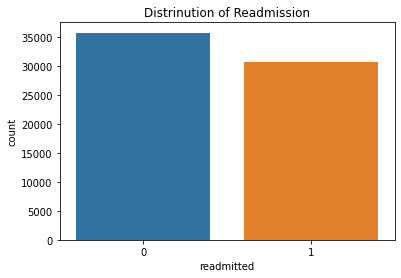

In [38]:
sns.countplot(td['readmitted']).set_title('Distrinution of Readmission')

In [39]:
from sklearn.neighbors import KNeighborsClassifier

model= KNeighborsClassifier()

In [40]:
model=model.fit(X_train, Y_train)

In [41]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16647 entries, 0 to 16646
Columns: 2219 entries, time_in_hospital to diabetesMed_Yes
dtypes: float64(1), int64(8), uint8(2210)
memory usage: 36.2 MB


In [42]:
X=td.drop(['patient_id','encounter_id','index'],axis=1)
Y=td['readmitted'].values

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=143)

In [45]:
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [47]:
y_pred=model.predict(X_test)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71     10809
           1       0.66      0.59      0.62      9168

    accuracy                           0.67     19977
   macro avg       0.67      0.66      0.66     19977
weighted avg       0.67      0.67      0.67     19977



In [60]:
df['readmitted'] = y_pred
df.to_csv('sample_submission.csv')